# Modeling Quantum Optical Experiments 

The HTML for this notebook can be found at https://robhendrik.github.io/Modeling-Quantum-Optical-Experiments-in-Python/

For the Jupyter notebook check: https://github.com/robhendrik/Modeling-Quantum-Optical-Experiments-in-Python

In [1]:
# Generic imports
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Install the package via: pip install FockStateCircuit
# or check the GitHub repository: https://github.com/robhendrik/FockStateCircuit/
import fock_state_circuit as fsc


Light has been used in famous experiments in physics, especially on fundamental quantum properties like entanglement. Photons (light particles that appear when describing light with quantum mechanics) have the nice property that they are not easily affected by the environment, and Nature gives us a few mechanisms to create entanglement between these photons. Photons were used in the first experimental demonstration of entanglement, in demonstrating non-locality by violating Bell's inequalities, and in the first realization of quantum teleportation.

In this post, we show how we can use Python to model optical quantum circuits by using the class `FockStateCircuit`. 'Fock states' (a.k.a. photon number states) are quantum states with a well-defined number of photons (typically low numbers like 0,1,2,3, etc.) The class `FockStateCircuit` supports optical channels where optical components (e.g., beamsplitters, wave plates) create an interaction. The package also supports classical channels to store the result of a measurement or to set the behavior of optical components.

FockStateCircuits run instances from the class `CollectionOfStates`. These are collections of states belonging to the FockStateCircuit. The states describe photon numbers in the optical channels and the values of the classical channels. When we run a collection-of-states on a circuit, the collection will evolve through the circuit from an 'input' collection-of-states to an 'output' collection-of-states.

The states in the collections are instances of the class `State`. The states describe photon numbers in the optical channels and the values of the classical channels. The states also carry the history of the different measurement results during evolution through the circuit and a reference to the initial state they originate from.

## The first circuit
Let's start by building a straightforward circuit with two optical channels that can carry either 0 or 1 photons. We have one half-wave plate oriented at 45 degrees in the circuit, coupling the two channels. Typically, channel zero represents horizontally polarized light, and channel one represents vertically polarized light. We use the function `evaluate_circuit()` to evaluate the circuit. This function runs all possible states through the circuit and returns a collection of states describing the results.

In [3]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 2, 
                                circuit_name='My First Circuit'
                                )
circuit.half_wave_plate_45(channel_horizontal=0, channel_vertical=1)

result = circuit.evaluate_circuit()

print(result)


Printing collection of states
Number of states in collection: 4
Identifier: 'identifier_0'
Initial state: '00'
Cumulative probability: 1.00
Optical components: 
	Component: '00' Amplitude: (1.00 - -0.00i), Probability: 1.00
Identifier: 'identifier_1'
Initial state: '10'
Cumulative probability: 1.00
Optical components: 
	Component: '01' Amplitude: (1.00 - 0.00i), Probability: 1.00
Identifier: 'identifier_2'
Initial state: '01'
Cumulative probability: 1.00
Optical components: 
	Component: '10' Amplitude: (1.00 - 0.00i), Probability: 1.00
Identifier: 'identifier_3'
Initial state: '11'
Cumulative probability: 1.00
Optical components: 
	Component: '11' Amplitude: (1.00 - -0.00i), Probability: 1.00



If we print the collection of states returned from `evaluate_circuit`, we see four states in the output. Each state corresponds to a unique input state (called 'initial_state'). The initial states are '00' (no photon in any channel), '10' (photon in channel zero and no photon in channel one), '01' (no photon in channel zero and one photon in channel one), or '11' (a photon in both channels). Note that by default, the photon count in channel zero is the leftmost digit in the state description. When creating the circuit, we can change this order by setting `channel_0_left_in_state_name` to `False`.

For this circuit, we see that if the input state is '01', the output is '10', and if we start with '10', we end up with '01'. States' 00' and '11' remain unchanged. This effect is what we expect from a half-wave plate at 45 degrees. 

We can also draw the circuit layout by calling `circuit.draw()`. The layout is not that exciting for this circuit, but it can help to visually represent complex circuits.

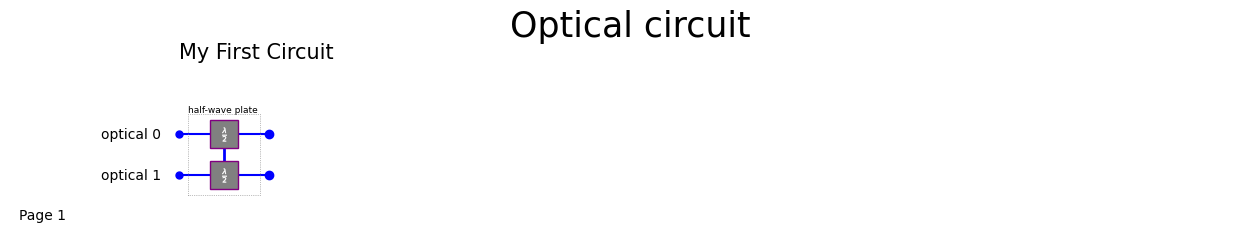

In [4]:
circuit.draw()

In the above example, we used all possible input states in the circuit. We want to be efficient and only run states of interest for larger systems. In that case, we can first create a collection of states containing all states. If we use the `circuit` as an argument in the constructor for a new collection of states, we will initialize the collection with all possible states for the circuit. We can then use a `filter` function to reduce the collection to the states of interest. In this case, we are only interested in states with exactly one photon, either in the first or the second channel, so we filter in the initial states' 01' and '10'.

Running this collection through the circuit will only give two states at the output.


In [5]:
initial_collection_of_states = fsc.CollectionOfStates(fock_state_circuit=circuit)
initial_collection_of_states.filter_on_initial_state(initial_state_to_filter=['01','10'])

result = circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)

print(result)



Printing collection of states
Number of states in collection: 2
Identifier: 'identifier_1'
Initial state: '10'
Cumulative probability: 1.00
Optical components: 
	Component: '01' Amplitude: (1.00 - 0.00i), Probability: 1.00
Identifier: 'identifier_2'
Initial state: '01'
Cumulative probability: 1.00
Optical components: 
	Component: '10' Amplitude: (1.00 - 0.00i), Probability: 1.00




## Adding measurement nodes
The next step is to add measurements to the circuit. For this, we need classical channels to write the measurement results. In this case, we will measure photon count in channel zero and channel one, so we need two classical channels. With these channels, we can add a measurement node `measure_optical_to_classical` behind the half-wave plate.

If we run the circuit for input states '10' and '01', we see that the classical channels have been written at the output. For the output state with optical channels as '01', classical channel zero is '0', and classical channel one is '1'. In the implementation, the measurement does not destroy the photons; they are still in their channels. However, if we had a superposition, the photon state would have collapsed to a state corresponding to the measurement result.

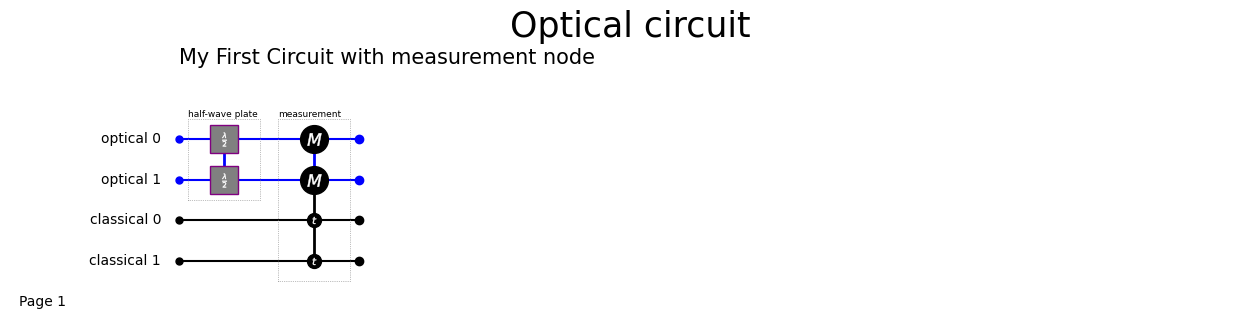

In [6]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 2,
                                no_of_classical_channels=2, 
                                circuit_name='My First Circuit with measurement node'
                                )
circuit.half_wave_plate_45(channel_horizontal=0, channel_vertical=1)
circuit.measure_optical_to_classical(optical_channels_to_be_measured=[0,1], classical_channels_to_be_written=[0,1])
circuit.draw()


In [7]:

initial_collection_of_states = fsc.CollectionOfStates(fock_state_circuit=circuit)
initial_collection_of_states.filter_on_initial_state(initial_state_to_filter=['01', '10'])

result = circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)

print(result)

Printing collection of states
Number of states in collection: 2
Identifier: 'identifier_1-M1a'
Initial state: '10'
Cumulative probability: 1.00
Classical values: ['0.00', '1.00']
Last measurement result:  
	Measurement results: ['0.00', '1.00'], Probability: 1.00
Optical components: 
	Component: '01' Amplitude: (1.00 - 0.00i), Probability: 1.00
Identifier: 'identifier_2-M1a'
Initial state: '01'
Cumulative probability: 1.00
Classical values: ['1.00', '0.00']
Last measurement result:  
	Measurement results: ['1.00', '0.00'], Probability: 1.00
Optical components: 
	Component: '10' Amplitude: (1.00 - 0.00i), Probability: 1.00



## Superpositions
In the above example, we always have optical states with a single component. We can, however, also have a superposition. Let's place the half-wave plate at 22.5 degrees to achieve this.

First, we look at a circuit without measurement. We limit the initial state to '10', so one photon in channel zero and no photon in channel one. After running `evaluate_circuit()`, we see that the output collection of states consists of a single state. This single state has as `optical_components`:

```
Optical components:
    Component: '10' Amplitude: (0.71–0.00i), Probability: 0.50
    Component: '01' Amplitude: (-0.71 + 0.00i), Probability: 0.50
```

The single state has optical components in a superposition between '10' and '01'. Both components have an equal weight, so they have an equal probability of being detected. Note, however, that the amplitudes have opposite signs.

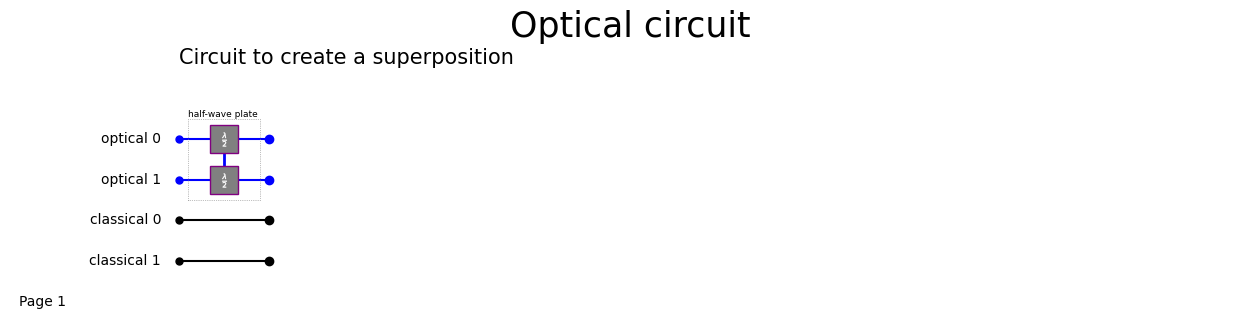

In [8]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 2,
                                no_of_classical_channels=2, 
                                circuit_name='Circuit to create a superposition'                               
                                )
circuit.half_wave_plate_225(channel_horizontal=0, channel_vertical=1)
circuit.draw()


In [9]:
initial_collection_of_states = fsc.CollectionOfStates(fock_state_circuit=circuit)
initial_collection_of_states.filter_on_initial_state(initial_state_to_filter=['01'])

result = circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)

print(result)

Printing collection of states
Number of states in collection: 1
Identifier: 'identifier_2'
Initial state: '01'
Cumulative probability: 1.00
Classical values: ['0.00', '0.00']
Optical components: 
	Component: '10' Amplitude: (0.71 - 0.00i), Probability: 0.50
	Component: '01' Amplitude: (-0.71 + 0.00i), Probability: 0.50



Now, let's add measurements to the circuit. We still have a half-wave plate at 22.5 degrees, which creates a superposition between horizontally and vertically polarized light. We measure channels zero and one and the photon count in the original horizontal and vertical orientation.
When we do this and print out the resulting collection of states, we see that we now have two states in this collection. These two states have the same origin. One of the states has classical values `['1.00', '0.00']`, while the other has classical values `['0.00', '1.00']`. The likelihood of ending up from the initial state in any of the states in the output collection is given by `Cumulative probability: 0.50`. So, in this case, any of the output states is equally likely.

So, our measurement turns a single 'pure' state into a 'statistical mixture,' where the 'weight' of each state in the mixture corresponds to the likelihood of finding a specific outcome.

In [10]:
# create the circuit
circuit = fsc.FockStateCircuit(
        length_of_fock_state = 2, 
        no_of_optical_channels = 2,
        no_of_classical_channels=2, 
        circuit_name='Circuit to create a superposition'
        )
circuit.half_wave_plate_225(
        channel_horizontal=0, 
        channel_vertical=1
        )
circuit.measure_optical_to_classical(
        optical_channels_to_be_measured=[0,1], 
        classical_channels_to_be_written=[0,1]
        )

# create the input collection of states
initial_collection_of_states = fsc.CollectionOfStates(
        fock_state_circuit=circuit
        )
initial_collection_of_states.filter_on_initial_state(
        initial_state_to_filter=['01']
        )

# run the circuit
result = circuit.evaluate_circuit(
      collection_of_states_input=initial_collection_of_states)

# analyze the result
print('Evaluate the output states one at a time')
for resulting_state_name, resulting_state in result.items():
    print('The initial state was:', '{!r}'.format(resulting_state.initial_state))
    print('\tThe resulting state has as values in the classical channels: ', resulting_state.classical_channel_values)
    print('\tThe likelihood to get this result is: ', '{:.02f}'.format(resulting_state.cumulative_probability))


Evaluate the output states one at a time
The initial state was: '01'
	The resulting state has as values in the classical channels:  [1, 0]
	The likelihood to get this result is:  0.50
The initial state was: '01'
	The resulting state has as values in the classical channels:  [0, 1]
	The likelihood to get this result is:  0.50



## Beamsplitters
So far, we have played with half-wave plates. Let's have a look at beamsplitters. We can start with the most 'simple' component, a non-polarizing beamsplitter which distributes the light equally over the output ports. We now define a circuit with four optical channels (horizontal and vertical polarization for each of the two ports of the beamsplitter). After the beamsplitter, we measure the two horizontally polarized ports (channels zero and two). In the input collection, we look at states with a single horizontally polarized photon in input port 'a' or input port 'b' (with the other port empty) or two horizontally polarized photons simultaneously in port 'a' and port 'b'. So the three input states are '1000', '0010', and '1010'. If we run this through the system, we can print the output collection (just as we did above), but we can also plot the results by calling `result.plot()`. 

This gives a bar graph with the outcomes for the different input states. The outcomes are the values of the classical channels after the measurement. We measured optical channel zero and wrote results to classical channel zero, and we measured optical channel two with results in classical channel one. So, in the outcome, '10' means a photon in channel zero, and outcome '01' represents a photon in channel two.

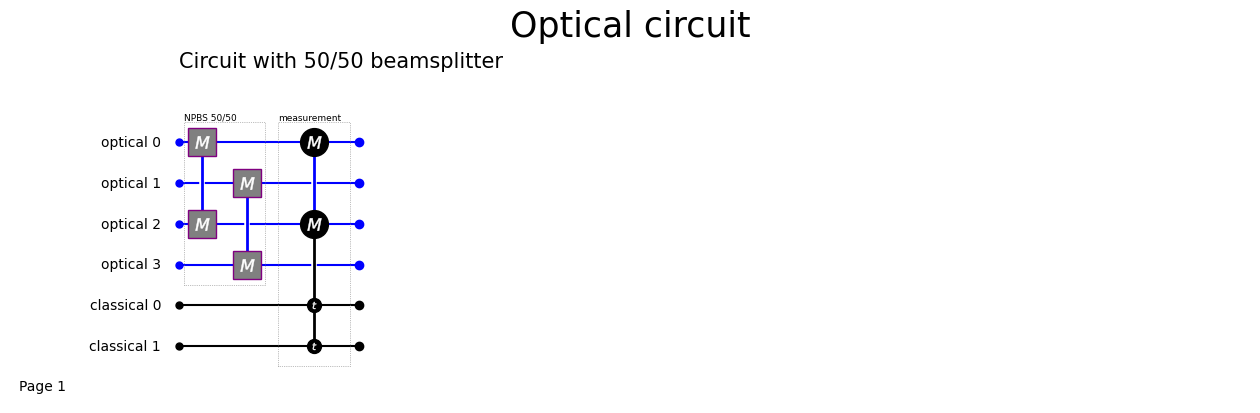

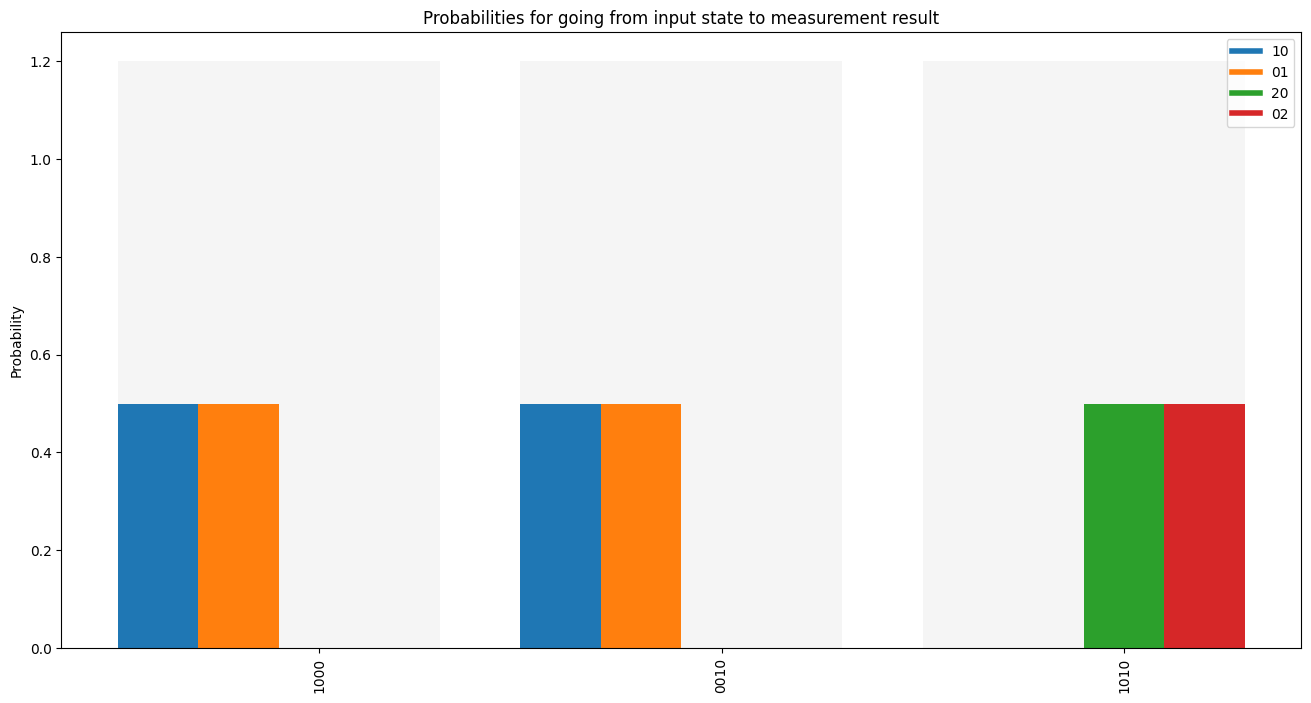

In [11]:
# create the circuit
circuit = fsc.FockStateCircuit(
              length_of_fock_state = 3, 
              no_of_optical_channels = 4,
              no_of_classical_channels=2,
              circuit_name="Circuit with 50/50 beamsplitter"
              )
circuit.non_polarizing_50_50_beamsplitter(
              input_channels_a=(0,1), 
              input_channels_b=(2,3)
              )
circuit.measure_optical_to_classical(
            optical_channels_to_be_measured=[0,2], 
            classical_channels_to_be_written=[0,1]
            )

circuit.draw()

# create the input collection of states
initial_collection_of_states = fsc.CollectionOfStates(
        fock_state_circuit=circuit
        )
initial_collection_of_states.filter_on_initial_state(
        initial_state_to_filter=['1000', '0010', '1010']
        )

result = circuit.evaluate_circuit(
        collection_of_states_input=initial_collection_of_states
        )

# run the circuit
result.plot()



Alternatively, we could choose the circuit with four classical channels by setting `no_of_classical_channels=4`. We could have measured all optical channels to a classical channel with the same index. The outcomes would then have been strings with four digits like '1000' and '0010'.
We did choose to create only two classical channels and evaluate outcomes' 10' and '01'. We see in the plot that the two outputs are equally likely for the input states with a single horizontal photon. As we expect from a 50%/50% beamsplitter, any input photon in a single port will be equally likely to be found behind any output port. But if we see the photon behind a specific port, we know it is not behind the other one (so outcome "11") is not found.
Now look at the input state with two photons, each in a different input port (initial state '1010'). We see two outcomes, each with a 50% likelihood. Either both photons are behind port 'a' (outcome '20') or port 'b' (outcome '02'). We never see the case where there is one photon behind each output port (so the outcome '11' is not found). This is the famous quantion HOM effect, named after Chung Ki Hong, Zheyu Ou, and Leonard Mandel [1].
Important note: We did define for this circuit `length_of_fock_state = 3`. The photon occupation in the optical channels can be 0,1 or 2 photons. If we had selected `length_of_fock_state = 2`, the system would only allow photon occupations of 0 or 1 per channel, and the outcomes '20' and '02' would not be possible. The system would return a 100% likelihood of getting to outcome '20', which is physically incorrect. So, setting the `length_of_fock_state` at the correct value is crucial for a valid result. At the same time, the number of possible states grows very fast if you increase `length_of_fock_state`. If you set `length_of_fock_state` to an unnecessarily high value, the executing speed will get lower than necessary.
We know every optical system should be reversible. If we take the output states of the beamsplitter and run them back through the beamsplitter, we should end up with the initial states we started with. In this case, let's create two states with optical components '2000' and '0020' and combine them with equal amplitudes.
For one input state (the state we will call `entangled_state_plus`), we use optical components:

```
{
  '2000' : {'amplitude': math.sqrt(1/2), 'probability': 0.5},
  '0020' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}
}
```

For the other input state (the state we will call `entangled_state_minus`), we use optical components:

```
{
  '2000' : {'amplitude': math.sqrt(1/2), 'probability': 0.5},
  '0020' : {'amplitude': -math.sqrt(1/2), 'probability': 0.5}
}
```

These two states are pure quantum states with entanglement between photons in channel zero and channel two.
We can add a 'mixed' state, which describes a statistical mixture. We create this state by calling:

```
mixed_state.set_collection_as_statistical_mixture([
        (state_2000.copy(), 0.5),
        (state_0020.copy(), 0.5)
      ])
```

Running these states through the circuit leads to the result we see after calling `result.plot()`

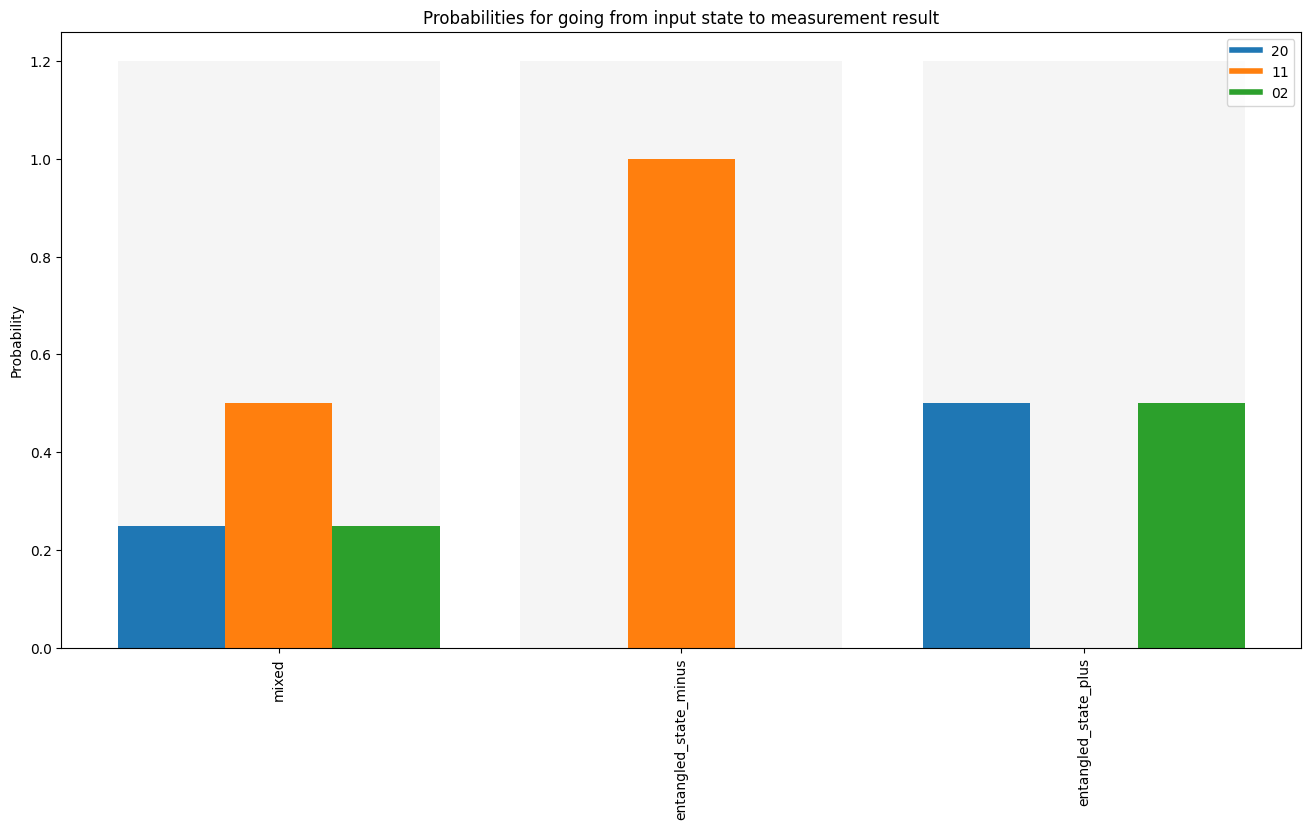

In [12]:
# create the circuit
circuit = fsc.FockStateCircuit(
              length_of_fock_state = 3, 
              no_of_optical_channels = 4,
              no_of_classical_channels=2,
              circuit_name="Circuit with 50/50 beamsplitter"
              )
circuit.non_polarizing_50_50_beamsplitter(
              input_channels_a=(0,1), 
              input_channels_b=(2,3)
              )
circuit.measure_optical_to_classical(
            optical_channels_to_be_measured=[0,2], 
            classical_channels_to_be_written=[0,1]
            )

# create the input collection of states
initial_collection_of_states = fsc.CollectionOfStates(fock_state_circuit=circuit)

state_2000 = initial_collection_of_states.get_state(initial_state='2000')
state_0020 = initial_collection_of_states.get_state(initial_state='0020')
initial_collection_of_states.clear()

mixed_state = initial_collection_of_states.copy()
mixed_state.set_collection_as_statistical_mixture([(state_2000.copy(), 0.5), (state_0020.copy(), 0.5)])

for state in mixed_state:
    state.initial_state = 'mixed'
    initial_collection_of_states.add_state(state=state)

entangled_state_minus = state_2000.create_initialized_state()
entangled_state_minus.initial_state = 'entangled_state_minus'
entangled_state_minus.optical_components = {'2000' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}, 
                                            '0020' : {'amplitude': -math.sqrt(1/2), 'probability': 0.5}}
initial_collection_of_states.add_state(state=entangled_state_minus)

entangled_state_plus = state_2000.create_initialized_state()
entangled_state_plus.initial_state = 'entangled_state_plus'
entangled_state_plus.optical_components = {'2000' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}, 
                                            '0020' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}}
initial_collection_of_states.add_state(state=entangled_state_plus)

# run the circuit
result = circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)

# plot the result
result.plot()




In [13]:
print(mixed_state)

Printing collection of states
Number of states in collection: 2
Identifier: 'identifier_7'
Initial state: 'mixed'
Cumulative probability: 0.50
Classical values: ['0.00', '0.00']
Optical components: 
	Component: '2000' Amplitude: (1.00 - 0.00i), Probability: 1.00
Identifier: 'identifier_t'
Initial state: 'mixed'
Cumulative probability: 0.50
Classical values: ['0.00', '0.00']
Optical components: 
	Component: '0020' Amplitude: (1.00 - 0.00i), Probability: 1.00



For the mixed state, we see in 50% of the cases the outcome with one photon in each port, in 25% of the cases both photons in port 'a', and in 25% of the cases both photons in port 'b'. For a statistical mixture, this is the expected result. The photons behave as small ping-pong balls running through this beamsplitter (i.e., we exclude quantum or optical interference).
For the entangled states, we see that for the state where both components have an amplitude with opposite sign, the outcome is always '1010', while for the other case, the outcome is always either '2000' or '0020'. This is what we expect. When we use '1010' as input, we find `entangled_state_minus` at the output. So we should expect to see '1010' back when we use `entangled_state_minus` as input.
Important note: In the above example, we used a statistical mixture. We model mixtures in a collection of states by taking states with the same value for 'initial_state' and giving them a 'cumulative_probability' representing their weight in the mixture. In this case, we could execute `print(mixed_state)` and get the following result.

This mixed state consists of two 'pure states', each with the same 'initial_state' and a 'cumulative_probability' of 50%. The initial state label is randomly generated, so we set the label to 'mixture' for nice plotting in the example discussed above.


## Alain Aspect's experiment ( violation of Bell's inequality)
Now, we can model one of the famous quantum optical experiments. Let's look at the experiment from Alain Aspect [2].
Figure 2 of Alain Aspect's article shows the setup we want to model.

We have a source of entangled photons which travel in two different directions. Then, we have detectors behind polarizers oriented at different angles. We are interested in determining the correlation between detecting a photon on one side and detecting a photon on the other side for different angles of the polarizers. For each side, we have two settings for the polarizer: S and T on one side and S and T on the other. Figure 2 in the Aspect paper shows a fast switch at each side (CI and CII) to determine the polarization.

We will model this by using a FockStateCircuit with four channels. Channels zero and one represent the system to the left of the photon generation, and channels two and three represent the system to the right. We then use detectors in channel zero and channel two, representing the detection in a polarization direction. A half-wave plate in front of the detector determines the detected polarization angle.

The polarization angles for which we expect maximum violation of the Bell inequality are:

* First photon.  S: θ = π/4, T: θ= 0
* Second photon. S: θ= π/8, T: θ = 3π/8

With this definition of measurements T and S the relative angle is always π/8, except for the situation where we use the T measurement for both photons. In that case the relative angle is 3π/8.

We run the circuit for these settings by iterating through the dictionary `waveplate_settings`. 


```
waveplate_settings = {
            'SS': {'left': math.pi/8 , 'right': math.pi/16},
            'TS': {'left': 0 , 'right': math.pi/16}, 
            'ST': {'left': math.pi/8 , 'right': 3*math.pi/16 },
            'TT': {'left': 0 , 'right': 3*math.pi/16}
```

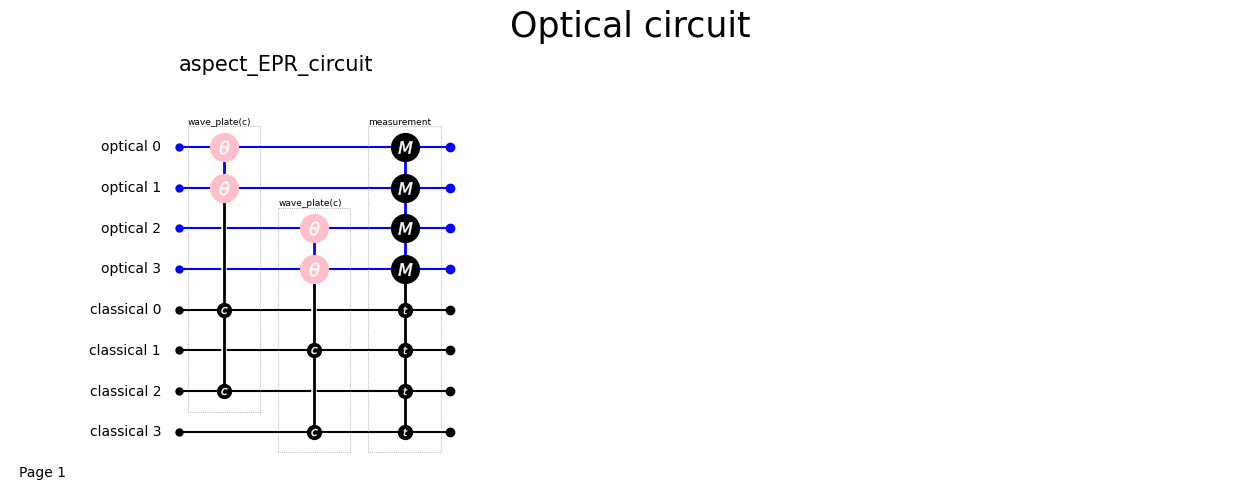

In [14]:
# create the circuit
aspect_EPR_circuit = fsc.FockStateCircuit(
                                length_of_fock_state = 3, 
                                no_of_optical_channels = 4,
                                no_of_classical_channels=4,
                                circuit_name='aspect_EPR_circuit'
                                )
aspect_EPR_circuit.wave_plate_classical_control(
                                optical_channel_horizontal=0,
                                optical_channel_vertical=1,
                                classical_channel_for_orientation=0,
                                classical_channel_for_phase_shift=2
                                )
aspect_EPR_circuit.wave_plate_classical_control(
                                optical_channel_horizontal=2,
                                optical_channel_vertical=3,
                                classical_channel_for_orientation=1,
                                classical_channel_for_phase_shift=3
                                )

aspect_EPR_circuit.measure_optical_to_classical(
                                optical_channels_to_be_measured=[0,1,2,3],
                                classical_channels_to_be_written=[0,1,2,3]
                                )
aspect_EPR_circuit.draw()

# define the angles we need for the half-wave plates 
# in order to rotate polarization over the correct angle
waveplate_settings = {
            'SS': {'left': math.pi/8 , 'right': math.pi/16},
            'TS': {'left': 0 , 'right': math.pi/16}, 
            'ST': {'left': math.pi/8 , 'right': 3*math.pi/16 },
            'TT': {'left': 0 , 'right': 3*math.pi/16}
            }

# define a function to calculate the CHSH value

def correlation_to_CHSH(correlation):
    CHSH = correlation['SS'] + correlation['TS'] + correlation['ST'] - correlation['TT']
    return CHSH



As input, we use an entangled state such that either both photons are horizontally or vertically polarized.

```
entangled_state.optical_components = {
  '1010' : {'amplitude': math.sqrt(1/2), 'probability': 0.5},
  '0101' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}
}
```

For each of the polarization settings, we measure the correlation. The CHSH value from this correlation. The prediction from quantum theory is that CHSH is 2√2 for the specific angles used in this simulation.

```
def correlation_to_CHSH(correlation):
    CHSH = correlation['SS'] + correlation['TS'] + correlation['ST'] - correlation['TT']
    return CHSH
``` 
If we run our system with the `entangled_state` as input and the half-wave plate orientation angles defined in `polarization_settings`, we find the value we expect from quantum mechanics:

```
CHSH for entangled state and polarization settings 
for maximum Bell inequality violation:  2.83
```

In [15]:
# initialize an empty collection of states
initial_collection_of_states = fsc.CollectionOfStates(fock_state_circuit=aspect_EPR_circuit)
initial_collection_of_states.clear()

# create an entangled state where both photons are either both 'H' polarized or both 'V' polarized
# the optical state is 1/sqrt(2)  ( |HH> + |VV> )
entangled_state = fsc.State(collection_of_states=initial_collection_of_states)
entangled_state.initial_state = 'entangled_state'
entangled_state.optical_components = {
            '1010' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}, 
            '0101' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}
            }

# fill the collection of states with copies of the entangled state
# where the classical channel values are filled to set the half-wave plates
for key, setting in waveplate_settings.items():
    state = entangled_state.copy()
    state.classical_channel_values = [setting['left'],setting['right'],np.pi,np.pi]
    state.initial_state = 'entangled_state_' + key
    state.cumulative_probability = 1
    initial_collection_of_states.add_state(state)

# run the circuit
result = aspect_EPR_circuit.evaluate_circuit(
            collection_of_states_input=initial_collection_of_states
            )

# initialize the correlation dictionary
correlation = {
            'SS': 0, 
            'TS': 0, 
            'ST': 0, 
            'TT': 0
            }

# evaluate the resulting collection
for state in result:
    label = state.initial_state[-2:] # label is the last two letters
    if state.classical_channel_values[0:2] == state.classical_channel_values[2:4]:
        correlation[label] += state.cumulative_probability
    else:
        correlation[label] -= state.cumulative_probability

print("CHSH for entangled state and polarization settings \nfor maximum Bell inequality violation: ",
       '{:.2f}'.format(correlation_to_CHSH(correlation)))

CHSH for entangled state and polarization settings 
for maximum Bell inequality violation:  2.83


We can expand on this and plot the CHSH value as a function of the angular alignment of the half-wave plates. So we can take the settings:

```
    waveplate_settings = {
            'SS': {'left': math.pi/8 , 'right': p},
            'TS': {'left': 0 , 'right': p}, 
            'ST': {'left': math.pi/8 , 'right': p+math.pi/8 },
            'TT': {'left': 0 , 'right': p+math.pi/8}
            }
```

So the T and S measurements for the two photons are define as 
* First photon.  S: θ = π/4, T: θ= 0
* Second photon. S: θ= 2p, T: θ = 2p+ π/4

For p=0, the settings left and right are equal; for p=π/16, we have the setting for maximum violation of Bell's inequality. Creating a collection of states with different values for p allows us to evaluate the entire curve by calling `evaluate_circuit` once.  

This leads to a curve for the CHSH value where we see the maximum violation of Bell's inequalities for p=π/16. For the full code see GitHub. The code snippet for producing the graph is pasted at the bottom of this post [3].

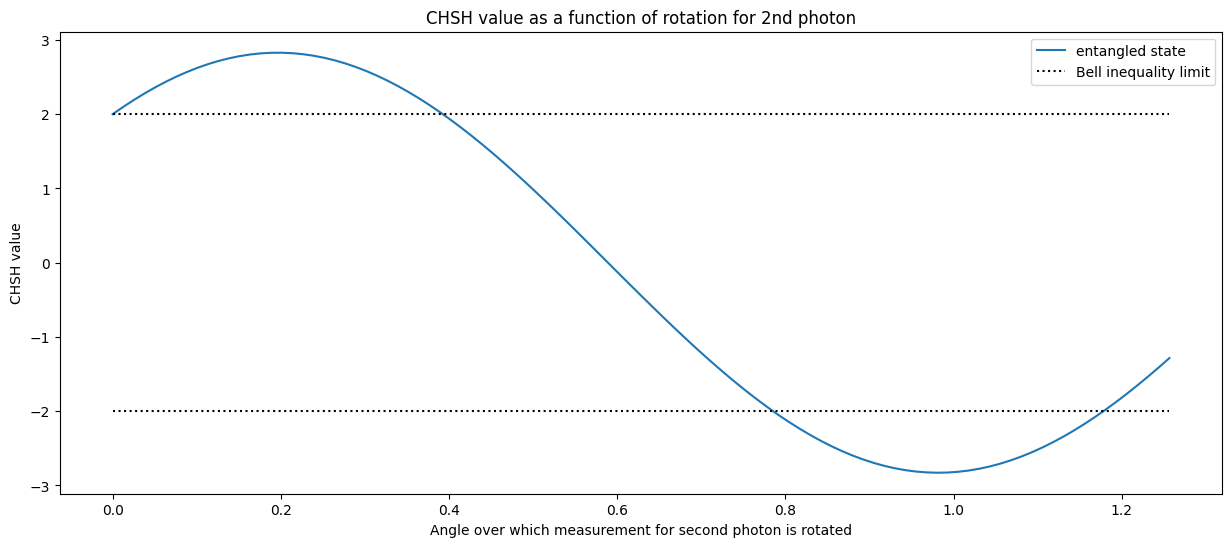

In [16]:
# create a list of angles to rotate wave plate for second photon
angles = [j*math.pi/250 for j in range(101)]

# initialize a list to store the results
correlation = {
            'SS': 0, 
            'TS': 0, 
            'ST': 0, 
            'TT': 0
            }
correlation_list = [correlation.copy() for _ in range(len(angles))]

# initialize an empty collection of states
initial_collection_of_states = fsc.CollectionOfStates(fock_state_circuit=aspect_EPR_circuit)
initial_collection_of_states.clear()

# create an entangled state where both photons are either both 'H' polarized or both 'V' polarized
# the optical state is 1/sqrt(2)  ( |HH> + |VV> )
entangled_state = fsc.State(collection_of_states=initial_collection_of_states)
entangled_state.initial_state = 'entangled_state'
entangled_state.optical_components = {
            '1010' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}, 
            '0101' : {'amplitude': math.sqrt(1/2), 'probability': 0.5}
            }

# fill the collection of states with copies of the entangled state
# where the classical channel values are filled to set the half-wave plates
for index,p in enumerate(angles):
    waveplate_settings = {
            'SS': {'left': math.pi/8 , 'right': p},
            'TS': {'left': 0 , 'right': p}, 
            'ST': {'left': math.pi/8 , 'right': p+math.pi/8 },
            'TT': {'left': 0 , 'right': p+math.pi/8}
            }
  
    for key, setting in waveplate_settings.items():
        state = entangled_state.copy()
        state.classical_channel_values = [setting['left'],setting['right'],np.pi,np.pi]
        state.initial_state = '{:04d}'.format(index) + key
        state.cumulative_probability = 1
        initial_collection_of_states.add_state(state)

# run the circuit
result = aspect_EPR_circuit.evaluate_circuit(
            collection_of_states_input=initial_collection_of_states
            )

# evaluate the resulting collection
for state in result:
    label = state.initial_state[-2:] # label is the last two letters
    index = int(state.initial_state[:4]) # index the first 4 letter
    the_same = (state.classical_channel_values[0:2] == state.classical_channel_values[2:4])
    if the_same:
        correlation_list[index][label] += state.cumulative_probability
    else:
        correlation_list[index][label] -= state.cumulative_probability

CHSH_values = [correlation_to_CHSH(correlation) for correlation in correlation_list]

# plot the CHSH values 
plt.plot(angles,CHSH_values, label = 'entangled state')
plt.plot([0,max(angles)],[2,2], color = 'black', linestyle = ':', label = 'Bell inequality limit')
plt.plot([0,max(angles)],[-2,-2], color = 'black', linestyle = ':', label = None)
plt.title('CHSH value as a function of rotation for 2nd photon')
plt.xlabel("Angle over which measurement for second photon is rotated")
plt.ylabel("CHSH value")
plt.legend()

plt.show()

[1] C. K. Hong, Z. Y Ou,. L. Mandel, "Measurement of subpicosecond time intervals between two photons by interference," Phys. Rev. Lett. 59, 2044 (1987).

[2] A. Aspect, J. Dalibard, and G. Roger: Experimental test of Bell's inequalities using time-varying analyzers. Phys. Rev. Lett. 49, 1804 (1982)

[3] Code snippet for producing the CHSH graph shown in the post.

In [1]:
fsc.about()

NameError: name 'fsc' is not defined